In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_all = pd.read_csv('Global_Education.csv', encoding='windows-1251')
data_all.head()

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


**Удаление переменных, связанных с географическим положением:**

In [3]:
data = data_all.drop(['Longitude', 'Latitude '], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_columns = data.select_dtypes(exclude='object').columns

data[num_columns] = scaler.fit_transform(data[num_columns])

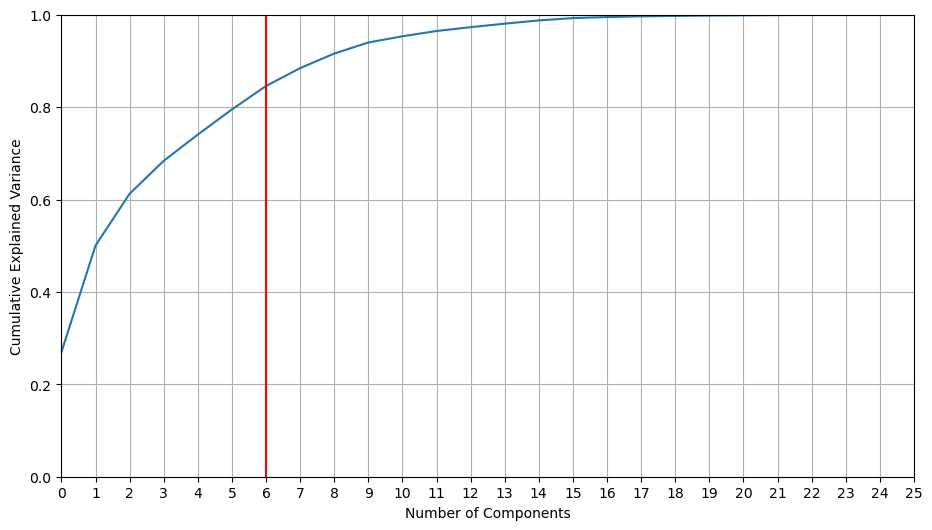

In [5]:
from sklearn.decomposition import PCA

pca = PCA().fit(data[num_columns])

explained_variance = pca.explained_variance_ratio_


plt.figure(figsize=(11, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(len(explained_variance)))
plt.axvline(6, c='r')
plt.ylim(0, 1)
plt.xlim(0, len(explained_variance)-1)
plt.show()

Видно, что первые 7 компонент описывают больше 80% данных

In [6]:
pca = PCA(n_components=7).fit(data[num_columns])

# Главные компоненты

In [7]:
pca_wheights = pd.DataFrame(
    pca.components_, 
    index=pca.get_feature_names_out(), 
    columns=data[num_columns].columns
)

pca_wheights

,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,OOSR_Upper_Secondary_Age_Female,Completion_Rate_Primary_Male,Completion_Rate_Primary_Female,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
pca0,0.270079,0.268059,0.238123,0.258661,0.289658,0.286095,0.281355,0.283020,0.169156,0.161340,...,-0.066348,-0.071510,-0.251955,-0.259985,0.046431,0.037184,0.249577,-0.024677,-0.242532,0.037935
pca1,-0.081915,-0.077969,-0.120745,-0.132518,-0.114131,-0.129188,-0.083558,-0.099359,0.353930,0.356606,...,0.083081,0.122004,0.046259,0.026265,0.128546,0.133415,-0.009158,0.095825,0.066673,0.132537
pca2,0.089610,0.098102,0.144602,0.173720,0.211922,0.214947,0.170184,0.179250,-0.018728,-0.023757,...,0.251914,0.290539,0.311886,0.294818,0.210585,0.205802,0.035178,0.185923,0.273900,0.026737
pca3,0.137866,0.136528,0.148916,0.142700,0.066099,0.080776,-0.061074,-0.051296,0.028645,0.019626,...,0.069945,0.143402,0.174898,0.157887,-0.590019,-0.588451,-0.130904,-0.168605,0.127994,0.126468
pca4,-0.153114,-0.170020,-0.019309,-0.014245,0.057228,0.040416,0.142306,0.115716,-0.018702,-0.020522,...,0.532839,0.466262,-0.044212,-0.059673,0.044224,0.045020,-0.235031,-0.297629,-0.107375,-0.308480
pca5,0.265298,0.273578,0.264152,0.200612,-0.202888,-0.191901,-0.309548,-0.303796,-0.073499,-0.063794,...,0.253469,0.178309,0.000130,0.024285,0.160030,0.166934,0.107693,0.066620,0.060214,0.399838
pca6,0.050134,0.036564,0.255779,0.251055,-0.006501,-0.014974,-0.038341,-0.083010,-0.029215,-0.028506,...,-0.272487,-0.243133,0.148410,0.153438,0.225208,0.232997,-0.417134,-0.598281,0.035330,-0.098829


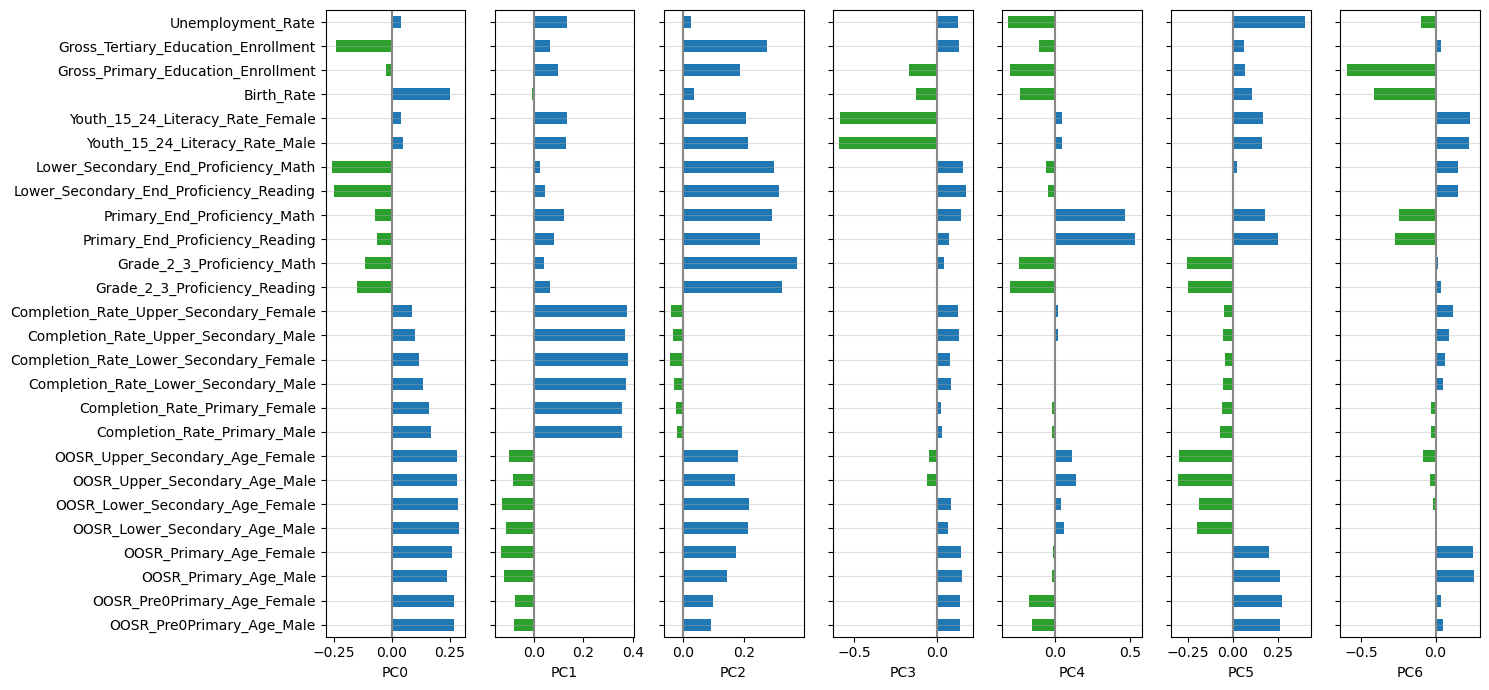

In [8]:
f, axes = plt.subplots(1, 7, figsize=(15, 7), sharey=True)

for i, ax in enumerate(axes):
    pc_loadings = pca_wheights.iloc[i, :]
    colors = ['C0' if l > 0 else 'C2' for l in pc_loadings]
    ax.axvline(color='#888888')
    pc_loadings.plot.barh(ax=ax, color=colors)
    ax.set_xlabel(f'PC{i}')
    ax.grid(True, axis='y', alpha=0.4)

plt.tight_layout()
plt.show()


## Корреляции главных компонент с первоначальными данными

In [9]:
data_pca = pd.DataFrame(
    pca.transform(data[num_columns]),
    columns=pca.get_feature_names_out(),
)


pca_corr = pd.DataFrame(
    columns=data[num_columns].columns,
    index=pca.get_feature_names_out(),
)

for i in data_pca.columns:
    for j in num_columns:
        pca_corr[j][i] = np.corrcoef(data_pca[i], data[j])[0, 1]

pca_corr = pca_corr.T

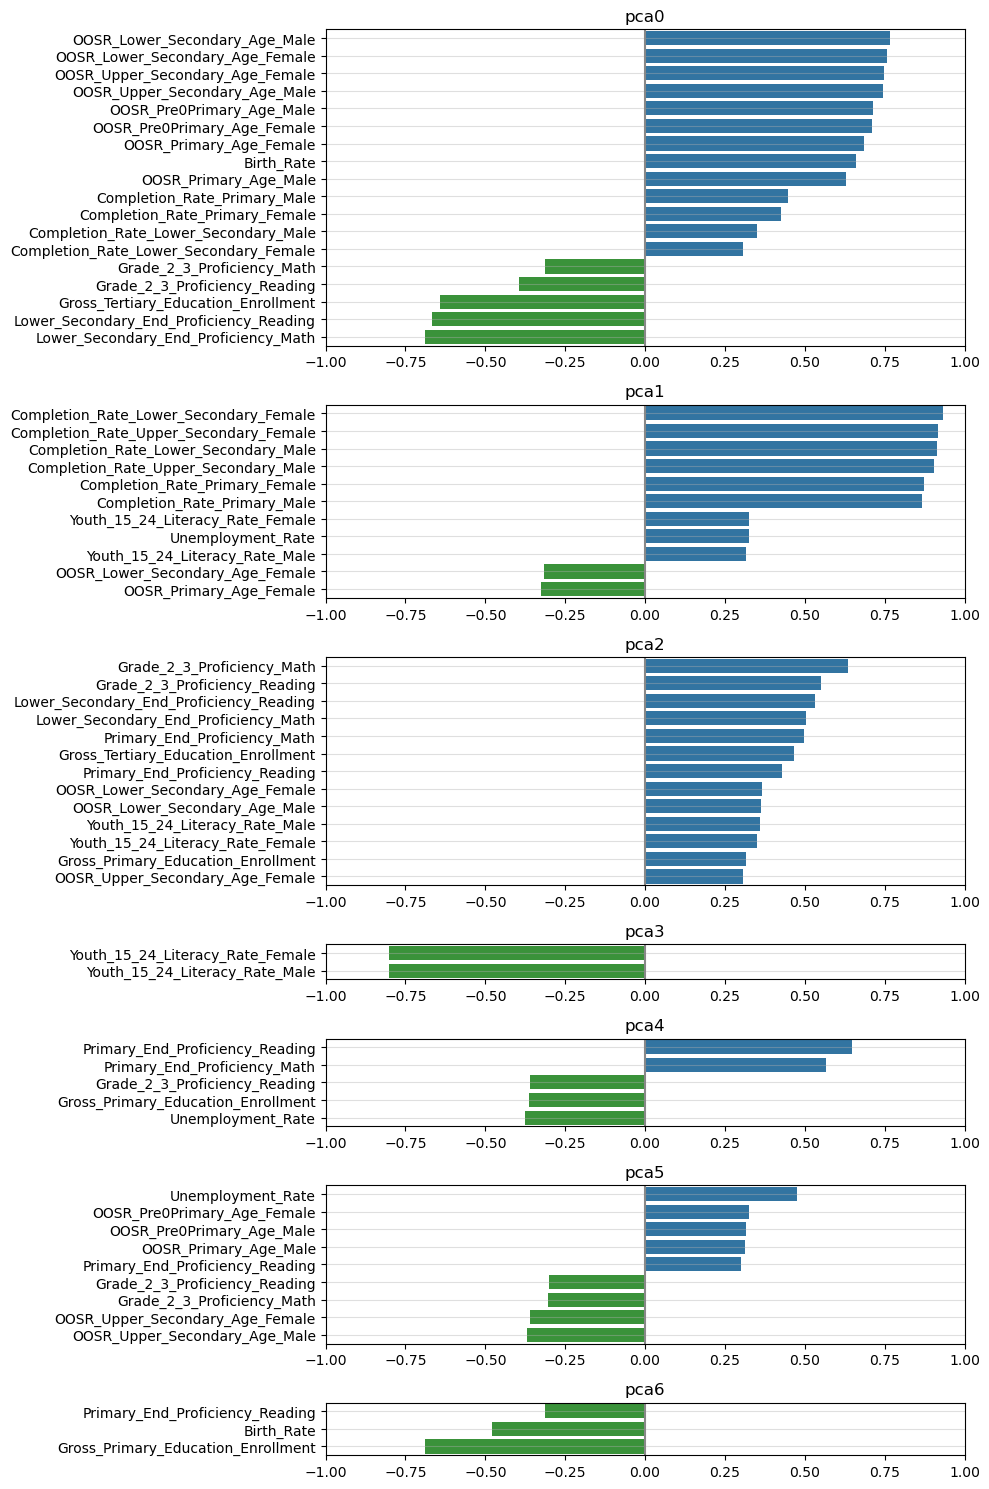

In [10]:
significant_counts = [
    (np.abs(pca_corr[f'pca{i}']) > 0.3).sum() for i in range(7)
]

height_ratios = [count / max(significant_counts) for count in significant_counts]

fig, axes = plt.subplots(7, figsize=(10, 15), gridspec_kw={'height_ratios': height_ratios})

for i, ax in enumerate(axes):
    component = f'pca{i}'
    corr_component = pca_corr[component]
    significant_corrs = corr_component[np.abs(corr_component) > 0.3].sort_values(ascending=False)
    
    colors = ['C0' if x > 0 else 'C2' for x in significant_corrs.values]

    sns.barplot(x=significant_corrs.values, y=significant_corrs.index, ax=ax, palette=colors)
    ax.set_title(component)
    ax.set_xlim(-1, 1)
    ax.axvline(color='#888888')
    ax.grid(True, axis='y', alpha=0.4)

plt.tight_layout()
plt.show()

## Интерпретация главных компонент

- PCA0 (Общий уровень необразованности и безграмотности)

Высокие положительные веса и корреляции: OOSR (доля не посещающих школу) на всех уровнях образования, особенно для среднего и старшего звена.

Отрицательные веса и корреляции: Уровень грамотности молодёжи и уровень зачисления в высшие учебные заведения.

Интерпретация: Эта компонента связана с общим уровнем образования в регионе, включая доступность и качество образования.
- PCA1 (Завершение образовательного процесса)

Высокие положительные веса и корреляции: Проценты завершения образования на различных уровнях, особенно в средней школе.

Интерпретация: Эта компонента отражает степень успешного завершения учащимися различных ступеней образовательного процесса.

- PCA2 (Профессиональные навыки и компетенции)

Высокие положительные веса и корреляции: Уровни владения чтением и математикой на разных стадиях обучения.

Интерпретация: Эта компонента связана с профессиональными навыками и компетенциями, приобретаемыми в процессе обучения.

- PCA3 (Безграмотность и образовательные тренды)

Высокие отрицательные веса и корреляции: Уровень грамотности молодёжи.

Интерпретация: Эта компонента может отражать текущие тенденции в образовании и грамотности, особенно среди молодёжи.

- PCA4 (Расширенные образовательные навыки)

Высокие положительные веса и корреляции: Уровень владения чтением и математикой по окончании начальной школы.

Интерпретация: Эта компонента может указывать на уровень развития расширенных образовательных навыков в раннем возрасте.

- PCA5 (Экономические и социальные факторы)

Высокие положительные веса и корреляции: Уровень безработицы.

Интерпретация: Эта компонента может отражать влияние экономических и социальных факторов на образование.

- PCA6 (Демографические и региональные особенности)

Высокие отрицательные веса и корреляции: Рождаемость и общий уровень зачисления в начальные учебные заведения.

Интерпретация: Эта компонента, возможно, связана с демографическими и региональными особенностями, влияющими на образование.

In [11]:
data_pca.columns = [
    'Общий уровень необразованности и безграмотности',
    'Завершение образовательного процесса',
    'Профессиональные навыки и компетенции',
    'Безграмотность и образовательные тренды',
    'Расширенные образовательные навыки',
    'Экономические и социальные факторы',
    'Демографические и региональные особенности'
]

In [12]:
data_pca.head()

,Общий уровень необразованности и безграмотности,Завершение образовательного процесса,Профессиональные навыки и компетенции,Безграмотность и образовательные тренды,Расширенные образовательные навыки,Экономические и социальные факторы,Демографические и региональные особенности
0,0.952918,0.639169,-0.204713,-1.802112,0.139894,-0.824028,-1.358622
1,0.133369,4.348951,0.057740,-0.673929,-0.315693,0.361257,1.483143
2,-0.540085,2.499916,-0.917960,-1.877984,-0.705985,0.999810,0.011310
3,-1.745082,-1.963704,-2.517584,-0.423566,0.493049,-0.340487,-0.531779
4,0.594185,0.252080,-2.156292,0.121719,-1.232697,0.942075,-1.806658


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data_pca_norm = pd.DataFrame(
    scaler.fit_transform(data_pca),
    columns=data_pca.columns
)
data_pca_norm.head()

,Общий уровень необразованности и безграмотности,Завершение образовательного процесса,Профессиональные навыки и компетенции,Безграмотность и образовательные тренды,Расширенные образовательные навыки,Экономические и социальные факторы,Демографические и региональные особенности
0,0.422870,0.522484,0.447492,0.198376,0.378654,0.300248,0.206202
1,0.358006,0.892494,0.486609,0.379371,0.301778,0.466640,0.637833
2,0.304704,0.708073,0.341190,0.186204,0.235921,0.556281,0.414279
3,0.209333,0.262876,0.102781,0.419537,0.438245,0.368128,0.331790
4,0.394478,0.483876,0.156628,0.507017,0.147044,0.548176,0.138150


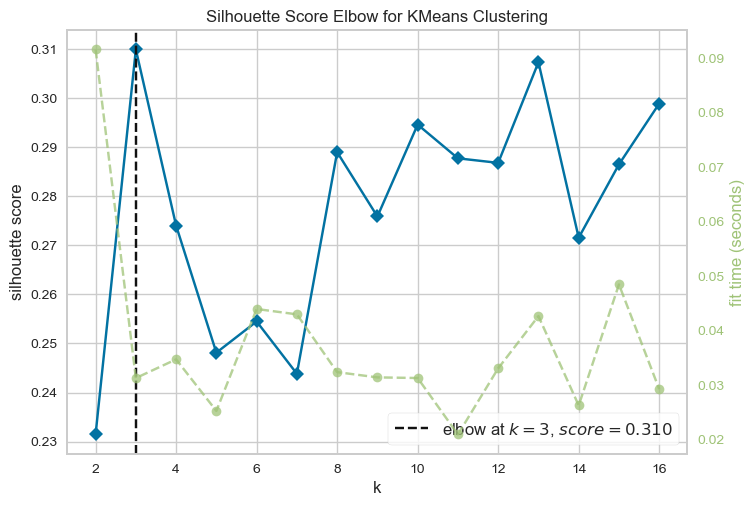

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42, n_init='auto', init='k-means++')
visualizer = KElbowVisualizer(model, k=(2, 17), metric='silhouette')

visualizer.fit(data_pca)
visualizer.show()
plt.show()

In [15]:
model = KMeans(n_clusters=3, random_state=42, n_init='auto', init='k-means++')
model.fit(data_pca)

model_norm = KMeans(n_clusters=9, random_state=42, n_init='auto', init='k-means++')
model_norm.fit(data_pca_norm)

KMeans(n_clusters=9, n_init='auto', random_state=42)

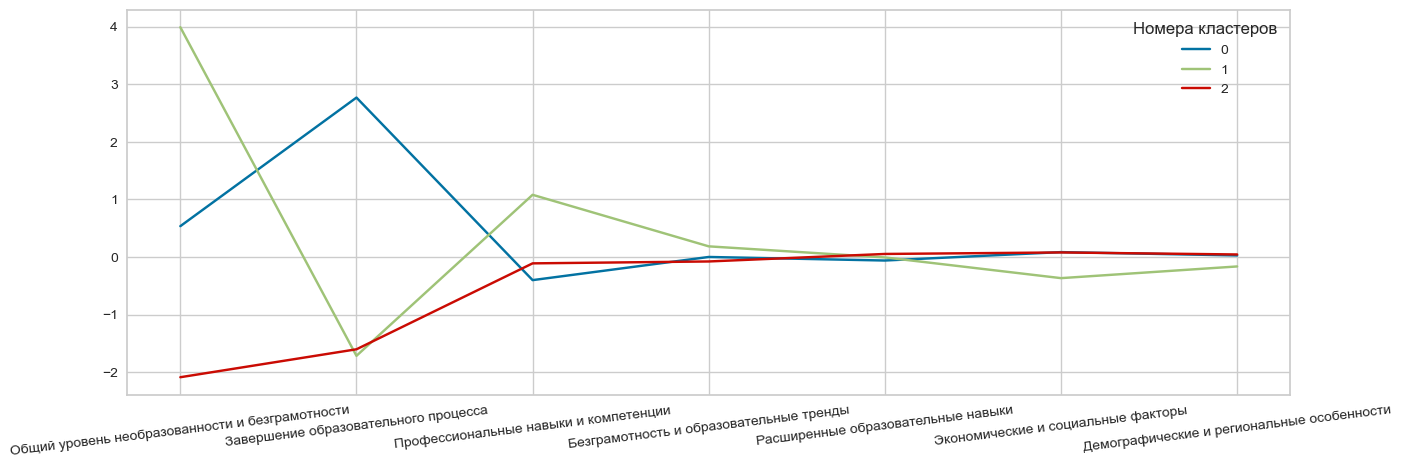

In [16]:
centers = pd.DataFrame(model.cluster_centers_, columns=data_pca.columns).T

plt.figure(figsize=(15, 5))
plt.plot(centers)
plt.xticks(rotation=7)
plt.legend(centers.columns, title='Номера кластеров', bbox_to_anchor=(1, 1))
plt.show()

Данная кластеризация основана на трёх компонентах, сильнее всего описывающих дисперсии признаков исходного датасета

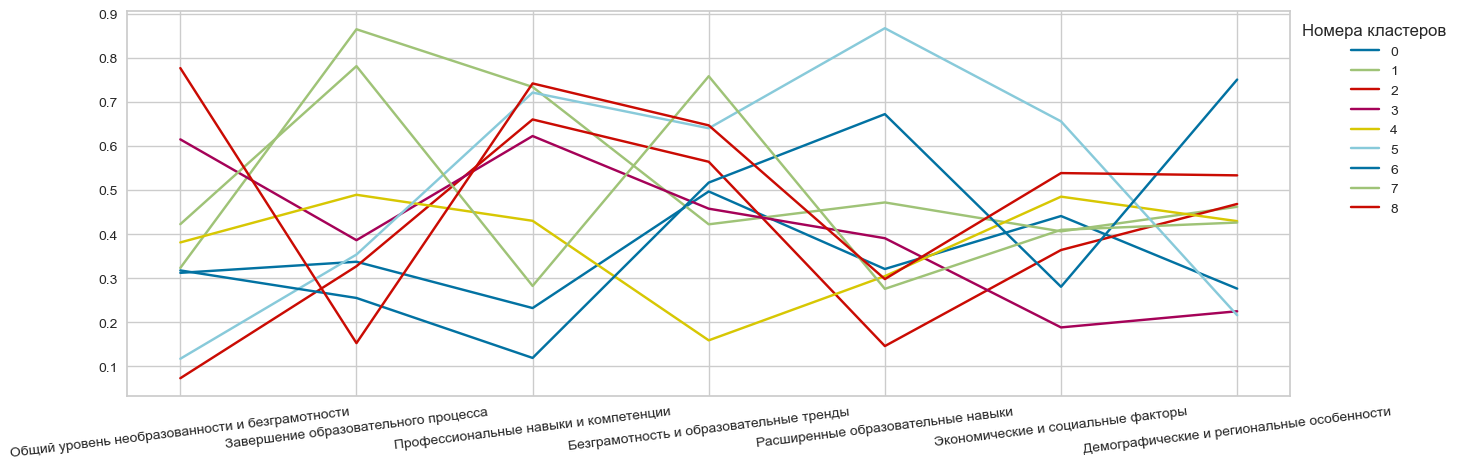

In [17]:
centers = pd.DataFrame(model_norm.cluster_centers_, columns=data_pca_norm.columns).T

plt.figure(figsize=(15, 5))
plt.plot(centers)
plt.xticks(rotation=7)
plt.legend(centers.columns, title='Номера кластеров', bbox_to_anchor=(1, 1))
plt.show()

Кластеризация на основе нормализованных главных компонент указывает на оптимальное разделение данных на девять кластеров, в то время как кластеризация на основе не нормализованных главных компонент указывает на оптимальное разделение на три кластера. Это различие связано с тем, что в не нормализованных данных компоненты с большей дисперсией могут оказывать более сильное влияние на процесс кластеризации. Включение в анализ переменных с меньшей дисперсией, которое достигается путем нормализации, обеспечивает более детальное разделение данных на кластеры, выявляя более сложные структуры и связи в данных

In [18]:
clusters = pd.DataFrame({
    'Кластеры по нормализованным компонентам': model_norm.labels_,
    'Кластеры по компонентам': model.labels_
})

In [19]:
data_all

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
198,Vietnam,14.058324,108.277199,0,0,0,0,0,0,0,...,55,51,86,81,98,98,16.75,110.6,28.5,2.01
199,Yemen,15.552727,48.516388,96,96,10,21,23,34,46,...,0,0,0,0,0,0,30.45,93.6,10.2,12.91
200,Zambia,13.133897,27.849332,0,0,17,13,0,0,0,...,0,0,5,2,93,92,36.19,98.7,4.1,11.43


In [20]:
data_with_clusters = pd.concat([data_all, clusters], axis=1).drop(['Latitude ', 'Longitude'], axis=1)

data_pca_norm_with_clusters = pd.concat(
    [
        data_all['Countries and areas'], 
        data_pca_norm, 
        clusters['Кластеры по нормализованным компонентам']
    ], axis=1
)

data_pca_with_clusters = pd.concat(
    [
        data_all['Countries and areas'],
        data_pca, 
        clusters['Кластеры по компонентам']
    ], axis=1
)

In [21]:
data_pca_norm_with_clusters

,Countries and areas,Общий уровень необразованности и безграмотности,Завершение образовательного процесса,Профессиональные навыки и компетенции,Безграмотность и образовательные тренды,Расширенные образовательные навыки,Экономические и социальные факторы,Демографические и региональные особенности,Кластеры по нормализованным компонентам
0,Afghanistan,0.422870,0.522484,0.447492,0.198376,0.378654,0.300248,0.206202,4
1,Albania,0.358006,0.892494,0.486609,0.379371,0.301778,0.466640,0.637833,1
2,Algeria,0.304704,0.708073,0.341190,0.186204,0.235921,0.556281,0.414279,4
3,Andorra,0.209333,0.262876,0.102781,0.419537,0.438245,0.368128,0.331790,0
4,Angola,0.394478,0.483876,0.156628,0.507017,0.147044,0.548176,0.138150,0
...,...,...,...,...,...,...,...,...,...
197,Venezuela,0.340860,0.220871,0.397243,0.571688,0.307598,0.457546,0.350930,0
198,Vietnam,0.226239,0.866135,0.641291,0.383029,0.720961,0.554072,0.433650,1
199,Yemen,0.763857,0.369490,0.537797,0.774129,0.160857,0.531528,0.351866,8
200,Zambia,0.422924,0.604349,0.295665,0.200368,0.243982,0.658917,0.459396,4


In [22]:
px.scatter(
    data_frame=data_pca_norm_with_clusters,
    color='Кластеры по нормализованным компонентам',
    x='Расширенные образовательные навыки',
    y='Завершение образовательного процесса',
    size='Общий уровень необразованности и безграмотности'
)

In [23]:
px.scatter(
    data_frame=pd.DataFrame(scaler.fit_transform(data_pca_with_clusters.iloc[:, 1:]), columns=data_pca_with_clusters.columns[1:]),
    color='Кластеры по компонентам',
    x='Общий уровень необразованности и безграмотности',
    y='Завершение образовательного процесса',
    size='Профессиональные навыки и компетенции'
)

Мы видим гораздо более понятное разделение на 3 кластера для ненормализованных данных, когда как для нормализованных - более хаотичное, но при этом подробное

In [24]:
px.bar(
    data_frame=data_pca_with_clusters.sort_values('Общий уровень необразованности и безграмотности'),
    x='Countries and areas',
    y='Общий уровень необразованности и безграмотности',
    color='Кластеры по компонентам'
)

In [25]:
px.bar(
    data_frame=data_pca_norm_with_clusters.sort_values('Общий уровень необразованности и безграмотности'),
    x='Countries and areas',
    y='Общий уровень необразованности и безграмотности',
    color='Кластеры по нормализованным компонентам'
)

Видно, что для нормализованных данных страны с самым плохим уровнем образования и грамотности и с самым хорошим определились в один кластер, но страны со стандартным показателем образованности делились уже по более неочевидным признакам и их совокупности

Из представленных двух моделей кластеризации сложно выбрать одну лучшую, так как одна подходит для поверхностного разделения по самым важным признакам, а другая - для более тщательного анализа и выявления кластеров, не зависящих только от уровня образования и грамотности населения. 

Как итог, мы можем вывести страны с самым худшим уровнем образованности и грамотности

In [26]:
px.choropleth(
    data_pca_with_clusters,
    locations='Countries and areas',
    locationmode='country names',
    color='Общий уровень необразованности и безграмотности',
    color_continuous_scale=px.colors.sequential.amp
)